In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
import plotly.express as px
warnings.simplefilter('ignore')
plt.style.use("fivethirtyeight")

C:\Users\Anshika\anaconda3\2023\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('customer_churn_large_dataset.csv')

In [3]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [4]:
df.shape

(100000, 9)

In [5]:
df.dtypes

CustomerID                      int64
Name                           object
Age                             int64
Gender                         object
Location                       object
Subscription_Length_Months      int64
Monthly_Bill                  float64
Total_Usage_GB                  int64
Churn                           int64
dtype: object

In [6]:
df.isna().sum()


CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [23]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


AGE - 
Average age of the customers is approximately 44(Years).
Youngest person is 18 (Years) old.
Oldest person is 70 (years) old.

Subscription_Length_Months -
On an average, customers have a subscription length of around 12.5 months.
The majority of customers have subscription lengths from 6 to 19 months.

Monthly_Bill - 
Average monthly bill is approx. $65.
Customers pay between approximately 47.50 Dollar to 82.64 Dollar per month.

Churn -
Churn values are binary - 1 and 0, indicating whether a customer has churned or not.
Churn rate is evenly distributed due to a mean close to around 0.5.

Total_Usage_GB - 
The average total usage is about 274.4 GB.
Total usage varies between 50 GB and 500 GB.
Most customers have total usage between 161 GB and 387 GB.


Categorical Data Count

In [19]:
df['Gender'].value_counts()

Female    50216
Male      49784
Name: Gender, dtype: int64

In [20]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

In [24]:
df.corr()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
CustomerID,1.000000,-0.001085,0.005444,0.001265,-0.004025,-0.004586
Age,-0.001085,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.005444,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001265,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,-0.004025,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,-0.004586,0.001559,0.002328,-0.000211,-0.002842,1.000000


Printing unique value from each column
Deleting unneccessary columns i.e - (CustomerID,Name)

Analyzing Outliers

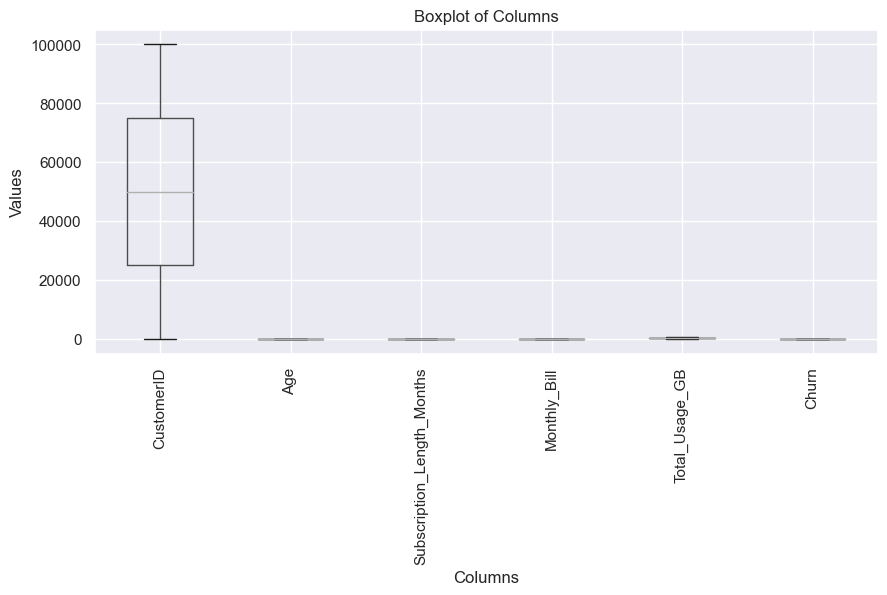

In [27]:
num_columns = len(df.columns)
fig, ax = plt.subplots(figsize=(6, 2))
if num_columns > 16:
    fig.set_size_inches(10, num_columns * 0.6)
else:
    fig.set_size_inches(num_columns, 4)

# Create a boxplot for each column
df.boxplot(ax=ax)

# Set the title and labels
plt.title("Boxplot of Columns")
plt.xlabel("Columns")
plt.ylabel("Values")

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

There is no outlier present 

In [9]:
data_cols = df.drop('CustomerID', axis = 1)

for col in data_cols.columns:
    print(col, "\n")
    print(df[col].unique(), "\n")

Name 

['Customer_1' 'Customer_2' 'Customer_3' ... 'Customer_99998'
 'Customer_99999' 'Customer_100000'] 

Age 

[63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23] 

Gender 

['Male' 'Female'] 

Location 

['Los Angeles' 'New York' 'Miami' 'Chicago' 'Houston'] 

Subscription_Length_Months 

[17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21] 

Monthly_Bill 

[73.36 48.76 85.47 ... 75.21 41.98 83.55] 

Total_Usage_GB 

[236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 304 281 177 117 137 322 427 403 237 439 336
 344 2

In [10]:
data = df.drop(['Name'], axis = 1)

Analyzing all the numerical/categorical values


In [11]:
numerical = data.select_dtypes(['number']).columns
print(f'Numerical: {numerical}\n')

categorical = data.columns.difference(numerical)

data[categorical] = data[categorical].astype('object')
print(f'Categorical: {categorical}')

Numerical: Index(['CustomerID', 'Age', 'Subscription_Length_Months', 'Monthly_Bill',
       'Total_Usage_GB', 'Churn'],
      dtype='object')

Categorical: Index(['Gender', 'Location'], dtype='object')


Creating ones, and zeros from categorical variables:

In [12]:
data2 = pd.get_dummies(data)

In [13]:
data2.head()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Gender_Female,Gender_Male,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York
0,1,63,17,73.36,236,0,0,1,0,0,1,0,0
1,2,62,1,48.76,172,0,1,0,0,0,0,0,1
2,3,24,5,85.47,460,0,1,0,0,0,1,0,0
3,4,36,3,97.94,297,1,1,0,0,0,0,1,0
4,5,46,19,58.14,266,0,1,0,0,0,0,1,0


In [30]:
#unique values in every column
data_cols = data2.drop('CustomerID', axis = 1)

for col in data_cols.columns:
    print(col, "\n")
    print(data2[col].unique(), "\n")

Age 

[63 62 24 36 46 67 30 20 53 50 44 34 28 42 55 43 31 41 58 64 70 18 25 27
 66 29 60 26 45 19 37 49 38 57 47 48 40 21 33 51 35 69 61 52 39 56 59 65
 22 54 68 32 23] 

Subscription_Length_Months 

[17  1  5  3 19 15 10 12 20 13  8 23  2  4 18  9 14 16  6  7 24 22 11 21] 

Monthly_Bill 

[73.36 48.76 85.47 ... 75.21 41.98 83.55] 

Total_Usage_GB 

[236 172 460 297 266 456 269 396 150 383 442 295 148 239 233 231 198 354
 429 243 270 389 226 393  89 183 135 185 151 115 194 278 423 202 495 162
 101 294 122 305 212 220 253 411 447 218 221 166  64  67 391 232 298 334
 326 459 371 299 376 214 329  50 444 113  76 134 184 319 235  85 332  73
 369 308 446 321  83 114 296 102 215 169 225 140  84 463 402 468 375 366
 404 471 204 320 178 149 361 304 281 177 117 137 322 427 403 237 439 336
 344 288 257 196 365 419 111 192 244 287 395 213 109 286 283 230 491 274
 335 462 407 126 199 351 261 496 480 400 303 197 181 474 348 112 457  54
 397 100 318 242 327 476 256 241 466 438  51 165 120 493  59 188

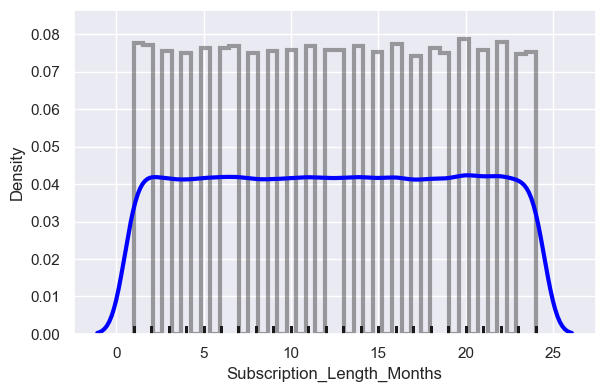

In [122]:
plt.figure(figsize = (6,4))

ax = sns.distplot(data['Subscription_Length_Months'], rug=True, rug_kws={"color": "k"},
                  kde_kws={"color": "blue", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 0.4, "color": "k"});

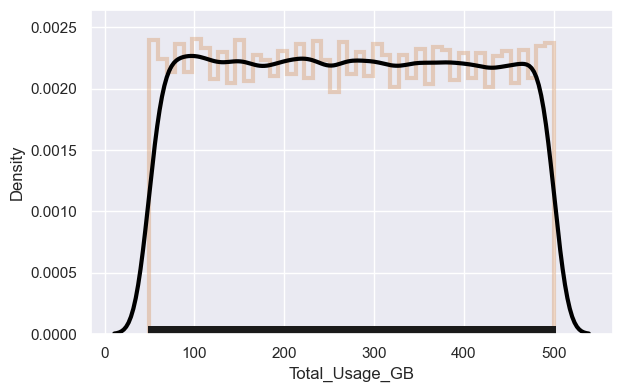

In [120]:
plt.figure(figsize = (6,4))

ax = sns.distplot(data['Total_Usage_GB'], rug=True, rug_kws={"color": "k"},
                  kde_kws={"color": "black", "lw": 3},
                  hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 0.4, "color" : '#d89968'});

In [62]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)
    
    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="plasma")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

<Figure size 2000x700 with 0 Axes>

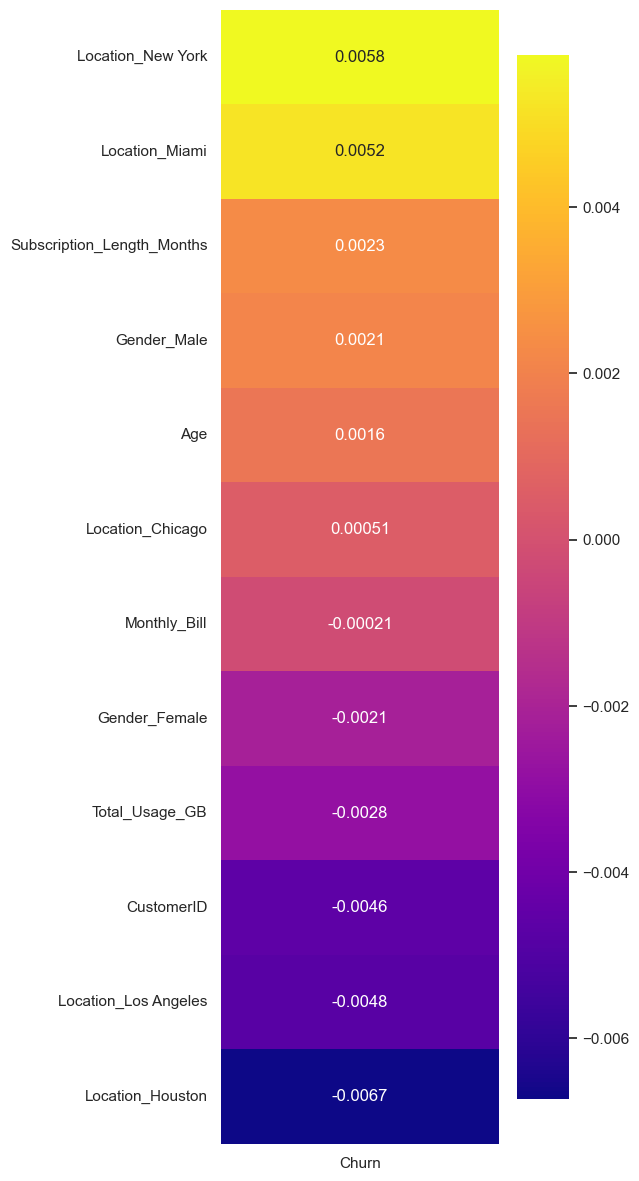

In [63]:
plt.figure(figsize = (20, 7))

corr_for_target(data2, 'Churn');

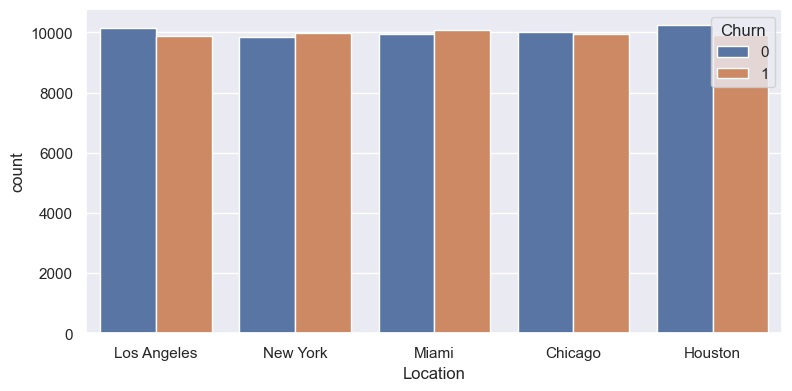

In [75]:
plt.figure(figsize = (8, 4))
sns.countplot('Location', data = df, hue = 'Churn');

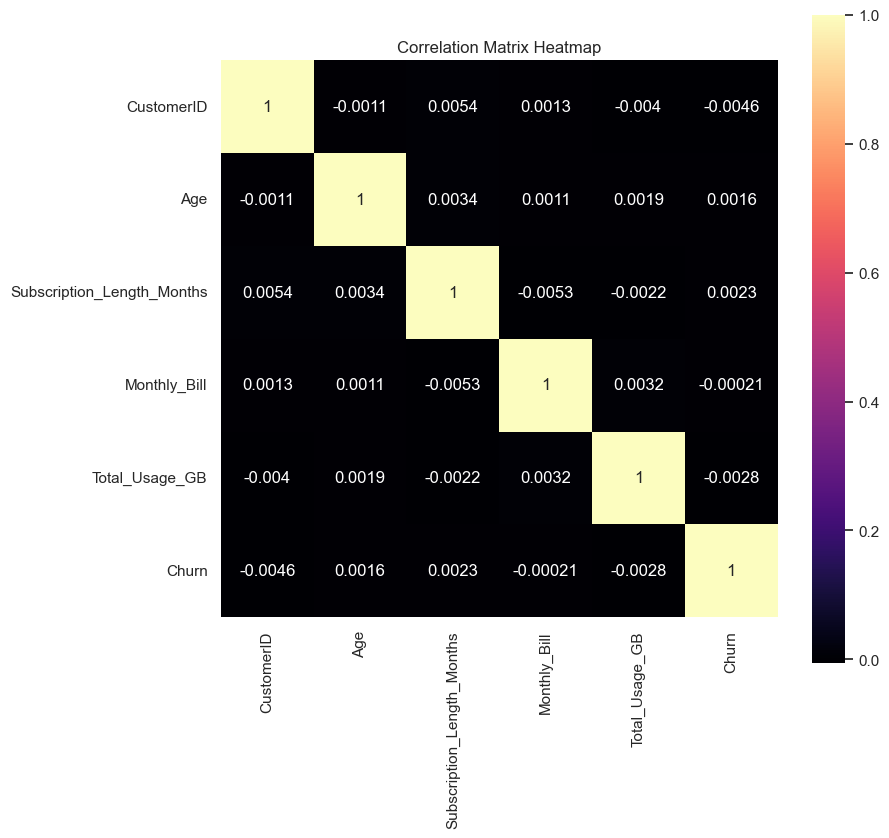

In [137]:
#checking colinearity between variables

corr_matrix = df.corr()

plt.figure(figsize=(8,8)) #(width,height)
sns.heatmap(corr_matrix, annot=True, cmap='magma', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

Splitting the dataset


In [38]:
x = data2.drop('Churn', axis=1)

y = data2['Churn']

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [41]:
X_train.shape, y_train.shape

((70000, 12), (70000,))

In [42]:
X_test.shape, y_test.shape


((30000, 12), (30000,))

Class Imbalance

In [44]:
class_counts = df['Churn'].value_counts()
class_counts

0    50221
1    49779
Name: Churn, dtype: int64

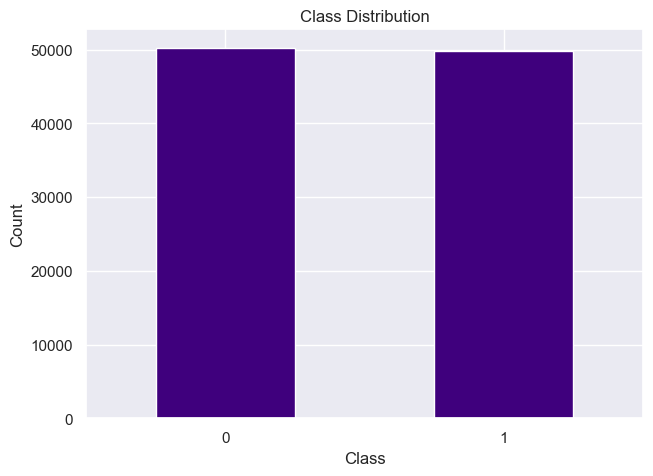

In [133]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a colormap
cmap = cm.inferno

# Plot the bar chart
class_counts.plot(kind='bar', colormap='Purples_r')

# Add a title, labels, and rotate the x-axis labels
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=360)

# Display the plot
plt.show()

Even Distribution of Class (0,1)

Checking multicolinearity of X_train_resampled


In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False)

vif

,Variable,VIF
5,Gender_Female,inf
6,Gender_Male,inf
7,Location_Chicago,inf
8,Location_Houston,inf
9,Location_Los Angeles,inf
10,Location_Miami,inf
11,Location_New York,inf
2,Subscription_Length_Months,1.000168
0,CustomerID,1.000126
3,Monthly_Bill,1.000109


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [69]:
import time
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [71]:
algorithms = [
    LogisticRegression(n_jobs=-1, random_state=42),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_jobs=-1),
    GradientBoostingClassifier(random_state=42),
    RandomForestClassifier(n_jobs=-1, random_state=42),
    SVC(random_state=42)
]

# Initialize the results dictionary for training data
results_train = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': [],
    'Building Time (s)': []
}

# Apply the algorithms and calculate performance metrics for training data
for algorithm in algorithms:
    start_time = time.time()  # Start timer

    algorithm_name = type(algorithm).__name__
    algorithm.fit(X_train, y_train)
    y_train_pred = algorithm.predict(X_train)

    accuracy = accuracy_score(y_train, y_train_pred)
    precision = precision_score(y_train, y_train_pred, average='weighted')
    recall = recall_score(y_train, y_train_pred, average='weighted')
    f1 = f1_score(y_train, y_train_pred, average='weighted')

    end_time = time.time()  # End timer
    building_time = end_time - start_time

    results_train['Algorithm'].append(algorithm_name)
    results_train['Accuracy'].append(accuracy)
    results_train['Precision'].append(precision)
    results_train['Recall'].append(recall)
    results_train['F1-score'].append(f1)
    results_train['Building Time (s)'].append(building_time)

# Create a dataframe for the training data results
df_train = pd.DataFrame(results_train)
df_train

,Algorithm,Accuracy,Precision,Recall,F1-score,Building Time (s)
0,LogisticRegression,0.500986,0.250987,0.500986,0.334429,12.367099
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,1.000000,1.737947
2,KNeighborsClassifier,0.687014,0.687014,0.687014,0.687014,3.106132
3,GradientBoostingClassifier,0.539971,0.540269,0.539971,0.538819,14.466734
4,RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,9.247264
5,SVC,0.503271,0.506014,0.503271,0.418699,31647.559450


In [72]:
results_test = {
    'Algorithm': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-score': []
}

# Apply the algorithms and calculate performance metrics for test data
for algorithm in algorithms:
    algorithm_name = type(algorithm).__name__
    y_test_pred = algorithm.predict(X_test)

    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    results_test['Algorithm'].append(algorithm_name)
    results_test['Accuracy'].append(accuracy)
    results_test['Precision'].append(precision)
    results_test['Recall'].append(recall)
    results_test['F1-score'].append(f1)

# Create a dataframe for the test data results
df_test = pd.DataFrame(results_test)
df_test

,Algorithm,Accuracy,Precision,Recall,F1-score
0,LogisticRegression,0.505067,0.255092,0.505067,0.338978
1,DecisionTreeClassifier,0.499833,0.499863,0.499833,0.499844
2,KNeighborsClassifier,0.499567,0.499606,0.499567,0.499579
3,GradientBoostingClassifier,0.503200,0.502857,0.503200,0.502398
4,RandomForestClassifier,0.498933,0.498712,0.498933,0.498591
5,SVC,0.506500,0.506308,0.506500,0.422036


Logistic Regression 

In [76]:
log = LogisticRegression()
log.fit(X_train, y_train)

log_y_pred = log.predict(X_test)
log_y_pred_train = log.predict(X_train)

In [77]:
log_test_as = metrics.accuracy_score(log_y_pred, y_test)
log_train_as = metrics.accuracy_score(log_y_pred_train, y_train)

In [78]:
print(f"Accuracy score for test data : {log_test_as}")
print(f"Accuracy score for train data : {log_train_as}")

Accuracy score for test data : 0.5050666666666667
Accuracy score for train data : 0.5009857142857143


In [79]:
print(metrics.classification_report(log_y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.51      0.67     30000
           1       0.00      0.00      0.00         0

    accuracy                           0.51     30000
   macro avg       0.50      0.25      0.34     30000
weighted avg       1.00      0.51      0.67     30000



In [80]:
y_proba_log = log.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_proba_log)

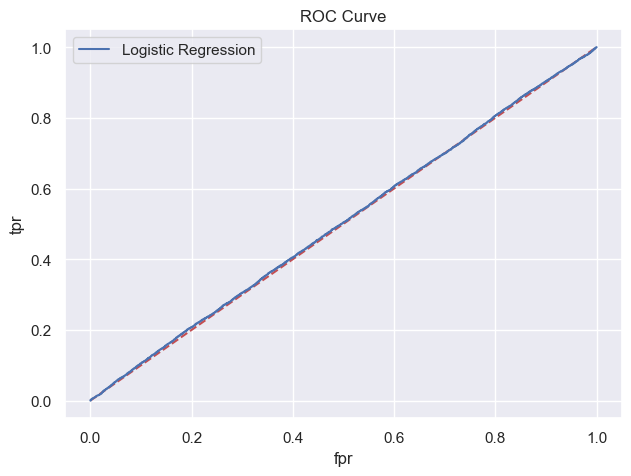

In [134]:
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label = 'Logistic Regression')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve')
plt.legend();

None of the above models are performing good on this dataset

In [93]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import recall_score

In [94]:
early_stopping = EarlyStopping(
    monitor='val_loss',        
    min_delta=0.001,           
    patience=10,              
    verbose=1,                
    mode='auto',              
    restore_best_weights=True 
)

In [95]:
checkpoint = ModelCheckpoint('ChurnClassifier.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [106]:
!pip install XGBoost
import xgboost as xgb

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 99.7/99.7 MB 5.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
from xgboost import XGBClassifier
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize models
gradient_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
xgboost_model = XGBClassifier(n_estimators=50, random_state=42)

# Initialize lists to store metrics
models = ['Gradient Boosting', 'XGBoost']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Building Time']
results_train = {metric: [] for metric in metrics}
results_test = {metric: [] for metric in metrics}

# Train and evaluate models
for model in [gradient_boost_model, xgboost_model]:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()

    # Predict on the training set
    y_train_pred = model.predict(X_train)

    # Calculate metrics on training data
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    building_time = end_time - start_time

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Calculate metrics on test data
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Append metrics to the results dictionaries
    results_train['Accuracy'].append(accuracy_train)
    results_train['Precision'].append(precision_train)
    results_train['Recall'].append(recall_train)
    results_train['F1 Score'].append(f1_train)
    results_train['Building Time'].append(building_time)

    results_test['Accuracy'].append(accuracy_test)
    results_test['Precision'].append(precision_test)
    results_test['Recall'].append(recall_test)
    results_test['F1 Score'].append(f1_test)
    results_test['Building Time'].append(building_time)

# Create DataFrames from the results
results_train_df = pd.DataFrame(results_train, index=models)
results_test_df = pd.DataFrame(results_test, index=models)

# Display the DataFrames
print("Training Data Results -->")
results_train_df


Training Data Results -->


,Accuracy,Precision,Recall,F1 Score,Building Time
Gradient Boosting,0.529529,0.530200,0.529529,0.526217,5.672780
XGBoost,0.634829,0.634875,0.634829,0.634779,0.394677


In [109]:
xgb_classifier = XGBClassifier(
    objective='binary:logistic',  # For binary classification
    random_state=42               # Random seed for reproducibility
)

xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [110]:
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Calculate metrics for train set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Train': [train_accuracy, train_precision, train_recall, train_f1],
    'Test': [test_accuracy, test_precision, test_recall, test_f1]
})

results

,Metric,Train,Test
0,Accuracy,0.689186,0.495767
1,Precision,0.691382,0.490442
2,Recall,0.681229,0.482085
3,F1-Score,0.686268,0.486228


Cross validation of accuracy


In [111]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='accuracy',n_jobs=-1)

print("Cross-Validation Scores (Accuracy):", scores)
print()
print("Mean Accuracy Score:", scores.mean())

Cross-Validation Scores (Accuracy): [0.494      0.49871429 0.50171429 0.50071429 0.50071429]

Mean Accuracy Score: 0.4991714285714285


In [112]:
scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5, scoring='recall',n_jobs=-1)

print("Cross-Validation Scores (Recall):", scores)
print()
print("Mean Recall Score:", scores.mean())

Cross-Validation Scores (Recall): [0.4834693  0.50114515 0.4868308  0.49169768 0.48096192]

Mean Recall Score: 0.4888209713913504


Evaluation of Model

In [113]:
# Calculate evaluation metrics for train data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1_score = f1_score(y_train, y_train_pred, average='macro')

# Predict on the test data
y_test_pred = xgb_classifier.predict(X_test)

# Calculate evaluation metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1_score = f1_score(y_test, y_test_pred, average='macro')

# Create a DataFrame to store the evaluation metrics
metrics_data = {
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_accuracy, test_accuracy],
    'Precision': [train_precision, test_precision],
    'Recall': [train_recall, test_recall],
    'F1-score': [train_f1_score, test_f1_score]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

,Dataset,Accuracy,Precision,Recall,F1-score
0,Train,0.689186,0.689222,0.689170,0.689159
1,Test,0.495767,0.495627,0.495629,0.495593


Confusion Matrix

In [114]:
from sklearn.metrics import confusion_matrix

# Calculate predictions for the training set using a threshold of 0.50
train_predictions = (xgb_classifier.predict_proba(X_train)[:, 1] >= 0.50).astype(int)
train_confusion_matrix = confusion_matrix(y_train, train_predictions)

# Calculate predictions for the test set using a threshold of 0.50
test_predictions = (xgb_classifier.predict_proba(X_test)[:, 1] >= 0.50).astype(int)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)

# Calculate the total number of samples in each set
train_total = len(y_train)
test_total = len(y_test)

# Calculate the confusion matrix in percentage form for the training set
train_confusion_matrix_percent = train_confusion_matrix / train_total * 100

# Calculate the confusion matrix in percentage form for the test set
test_confusion_matrix_percent = test_confusion_matrix / test_total * 100

# Create a dataframe for the confusion matrix
confusion_matrix_df = pd.DataFrame({'Training Set': train_confusion_matrix_percent.flatten(),
                                    'Test Set': test_confusion_matrix_percent.flatten()},
                                   index=['True Positive (%)', 'True Negative (%)', 'False Positive (%)', 'False Negative (%)', ])
#
confusion_matrix_df

,Training Set,Test Set
True Positive (%),34.924286,25.716667
True Negative (%),15.174286,24.790000
False Positive (%),15.907143,25.633333
False Negative (%),33.994286,23.860000


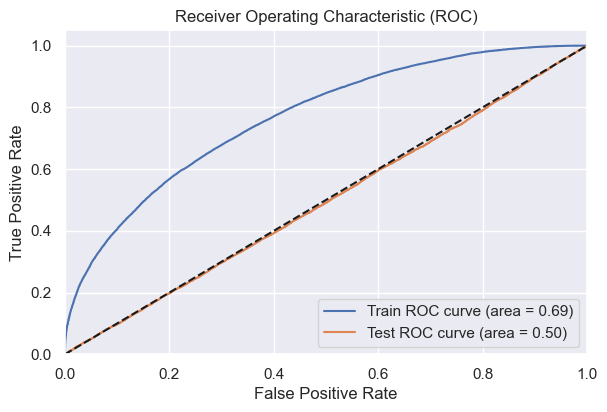

In [116]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate predicted probabilities for the train data
train_probabilities = xgb_classifier.predict_proba(X_train)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for train data
train_predictions = (train_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for train data
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, train_probabilities)

# Calculate the ROC-AUC score for train data
roc_auc_train = roc_auc_score(y_train, train_predictions)

# Calculate predicted probabilities for the test data
test_probabilities = xgb_classifier.predict_proba(X_test)[:, 1]

# Apply the threshold of 0.50 to obtain binary predictions for test data
test_predictions = (test_probabilities >= 0.50).astype(int)

# Calculate the false positive rate, true positive rate, and thresholds for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate the ROC-AUC score for test data
roc_auc_test = roc_auc_score(y_test, test_predictions)

# Plot the ROC curves
plt.figure(figsize=(6,4))
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [135]:
import joblib


joblib.dump(xgb_classifier, 'Customer_Churn_prediction_model.pkl')

['Customer_Churn_prediction_model.pkl']